In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/songdata5000.csv')
lyrics = df.iloc[:, [-1]]
print(lyrics)

                                                   text
0     Oh make me over  \nI'm all I wanna be  \nA wal...
1     Buongiorno Teresa  \nLike the sun you brighten...
2     Outside the house Mr. Simpson announced  \nTha...
3     He was a good lookin' guy  \nStood about six f...
4     Tonight we're gonna have a good time  \nOh we'...
5     So this is permanent, love's shattered pride. ...
6     I'm taking off this hat  \nAnd walking to the ...
7     Realization comes through reaping  \nReality c...
8     Back to bring the beat  \nGive me my boombox  ...
9     Here I am, dancing in the wind  \nMy back to y...
10    Here's another Sunday morning call  \nYer hear...
11    Seven islands to the high side of the bay, 'cr...
12    I'm happy you came to me first  \nBefore the b...
13    Never had trouble sleepin'  \nAlways had someo...
14    In a class room at the grade school just befor...
15    I can't believe what you did to me  \nDown on ...
16    Everybody's got a thing  \nBut some don't 

In [4]:
# read all lyrics into a corpus in lower case and get rid of all apostrophes
corpus1 = lyrics.iloc[:,-1].tolist()
corpus = [x.lower().replace('.','').replace(',','').replace("(",'').replace(")",'').replace("?",'') for x in corpus1]

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/felixholmberg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felixholmberg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[("'", 10307), ("i'm", 9203), ('love', 7808), ('know', 6057), ('oh', 5357), ('like', 5222), ('got', 4166), ('get', 3928), ('time', 3835), ('go', 3780)]
<FreqDist with 26778 samples and 578967 outcomes>


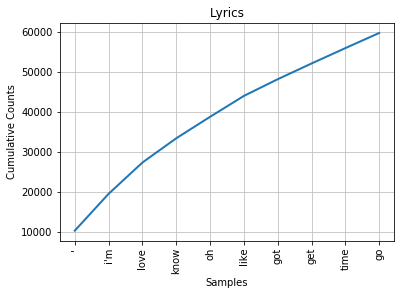

In [6]:
# Frequency Distribution 

#this is transforming the list into a string
corpusstring = ' '.join(corpus)

#tweettokenizer is different because it does not separate words with apostrophes. 
tknzr = TweetTokenizer()
corpusstring = tknzr.tokenize(corpusstring)
stop_words = set(stopwords.words('english'))
#removing stopwords in the string
corpusstring = [word for word in corpusstring if not word in stop_words]

fdistlyrics = nltk.FreqDist(corpusstring)
print(fdistlyrics.most_common(10))
print(fdistlyrics)
fdistlyrics.plot(10, cumulative = True, title = "Lyrics")

In [8]:
# we need our tfidf function
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.cluster import KMeans


def tfidf_vectorizer(corpus):
    cvect = CountVectorizer(lowercase=True, max_features=5000, 
                          max_df=0.8, 
                          stop_words="english") 
    count_matrix = cvect.fit_transform(corpus) 
    features = cvect.get_feature_names() 
    
    count_matrix = pd.DataFrame(count_matrix.todense()) 
    df_vect = count_matrix.astype(bool).sum(axis=0) 
    df_vect = np.log(len(corpus) / df_vect) 
    
    return features, np.array(count_matrix * df_vect) 

print("Extracting features from the training dataset ")

terms, X = tfidf_vectorizer(corpus)

print("n_samples: %d, n_features: %d" % X.shape)
print()

n_clusters = 6

km = KMeans(n_clusters, init='k-means++', max_iter=1000, n_init=1)

print("Clustering sparse data with %s" % km)

km.fit(X)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(n_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Extracting features from the training dataset 
n_samples: 5000, n_features: 5000

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
Cluster 0: praise forever sing endures continual hallelujah worthy overcome compares fall
Cluster 1: money donkey beautiful works riding rich hard ain easy die
Cluster 2: oh love baby don yeah want ll got know like
Cluster 3: la ee odl lay tra kids directions lee marley sha
Cluster 4: bala dont stop force want make im bang dawg thats
Cluster 5: lang bale na di ko kaya niya ako ang pa


In [9]:
# Clustering prediction
predictions = km.predict(X)
print(predictions[:500])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [10]:
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
# Rule based sentiment analysis with Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer() 
sentiment_list = []
for t in corpus:
    ss = sid.polarity_scores(t)
    sentiment_list.append(ss)

## convert list of sentiment scores to a dataframe
sentiment_df = pd.DataFrame(sentiment_list)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/felixholmberg/nltk_data...


In [12]:
top_pos = sentiment_df.copy()
top_neg = sentiment_df.copy()

top_pos.sort_values(by="pos", ascending=False, inplace=True)
top_neg.sort_values(by="neg", ascending=False, inplace=True)

top_pos = top_pos[0:10]
top_neg = top_neg[0:10]
print(top_pos)
print(top_neg)

      compound    neg    neu    pos
3808    0.9989  0.060  0.318  0.623
4574    0.9987  0.044  0.346  0.609
1039    0.9986  0.000  0.413  0.587
521     0.9993  0.056  0.364  0.580
4801    0.9998  0.024  0.402  0.574
4819    0.9972  0.000  0.430  0.570
4063    0.9988  0.010  0.425  0.565
2855    0.9997  0.099  0.351  0.551
2158    0.9992  0.000  0.457  0.543
3093    0.9995  0.008  0.460  0.532
      compound    neg    neu    pos
1486   -0.9995  0.603  0.324  0.073
3303   -0.9980  0.566  0.434  0.000
4915   -0.9982  0.513  0.431  0.055
3372   -0.9986  0.486  0.499  0.014
3967   -0.9980  0.476  0.411  0.114
2368   -0.9957  0.474  0.471  0.055
3701   -0.9982  0.473  0.436  0.091
3047   -0.9992  0.470  0.462  0.068
601    -0.9993  0.455  0.486  0.060
937    -0.9987  0.454  0.378  0.168


[('love', 160), ('yeah', 83), ('yes', 56), ('woo', 54), ('oh', 41), ('happy', 39), ('free', 35), ('easy', 33), ('believe', 33), ('lifesaver', 31), ('praise', 30), ('great', 25), ('time', 23), ('baby', 21), ('forever', 21)]
<FreqDist with 454 samples and 1851 outcomes>


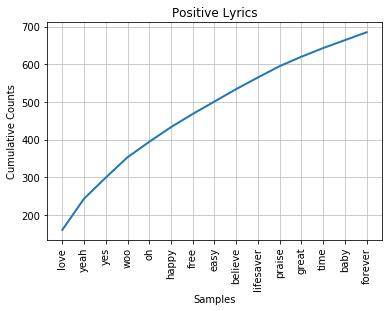

In [13]:
# Select the songs with positive probabilities larger than 0.5
posisongs = sentiment_df.loc[sentiment_df["pos"] > 0.5]

# Get the indices for the positive songs and take the corresponding lyrics
posi = lyrics.iloc[posisongs.index]

# Make a new corpus for the positive lyrics and get rid of the apostrophes
corpusposi = posi.iloc[:,-1].tolist()
corpusp = [x.lower().replace('\n', '').replace('.','').replace(',','').replace("(",'').replace(")",'').replace("?",'') for x in corpusposi]

# Eliminate the stopwords and find the most frequent words for the positive lyrics
corpusps = ' '.join(corpusp)

corpusps = tknzr.tokenize(corpusps)
corpusps = [word for word in corpusps if not word in stop_words]

fdistposi = nltk.FreqDist(corpusps)
print(fdistposi.most_common(15))
print(fdistposi)
fdistposi.plot(15, cumulative = True, title = "Positive Lyrics")

[('loneliness', 34), ("'", 20), ('fire', 14), ('come', 8), ('said', 7), ('kept', 7), ('saying', 7), ('fight', 7), ('botherin', 4), ('round', 4), ('worryin', 4), ('door', 3), ('well', 3), ('say', 3), ('ending', 3)]
<FreqDist with 104 samples and 241 outcomes>


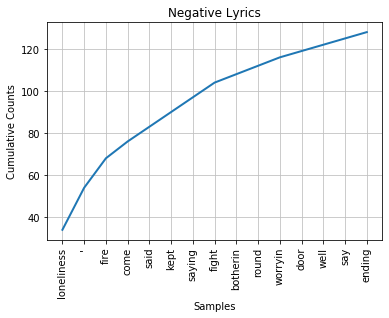

In [14]:
# Select the songs with negative probabilities larger than 0.5
negasongs = sentiment_df.loc[sentiment_df["neg"] > 0.5]

# Get the indices for the negative songs and take the corresponding lyrics
nega = lyrics.iloc[negasongs.index]

# Make a new corpus for the negative lyrics and get rid of the apostrophes
corpusnega = nega.iloc[:,-1].tolist()
corpusn = [x.lower().replace('\n', '').replace('.','').replace(',','').replace("(",'').replace(")",'').replace("?",'') for x in corpusnega]

# Eliminate the stopwords and find the most frequent words for the negative lyrics
corpusns = ' '.join(corpusn)

corpusns = tknzr.tokenize(corpusns)
corpusns = [word for word in corpusns if not word in stop_words]

fdistnega = nltk.FreqDist(corpusns)
print(fdistnega.most_common(15))
print(fdistnega)
fdistnega.plot(15, cumulative = True, title = "Negative Lyrics")

In [15]:
# Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer 

cvect = CountVectorizer(stop_words="english", max_features=1000)
X = cvect.fit_transform(corpus)

vocab = cvect.get_feature_names() 

print(vocab[0:10])

print(vocab[200:300])

['act', 'affair', 'afraid', 'age', 'ago', 'ah', 'ahead', 'ain', 'aint', 'air']
['different', 'dig', 'dirt', 'dirty', 'distance', 'doctor', 'does', 'doesn', 'dog', 'doin', 'doing', 'don', 'doo', 'door', 'double', 'doubt', 'drag', 'dream', 'dreaming', 'dreams', 'dress', 'dressed', 'drink', 'drinking', 'drive', 'driving', 'drop', 'dry', 'dust', 'dying', 'early', 'earth', 'easy', 'eat', 'edge', 'ee', 'electric', 'em', 'end', 'endless', 'ends', 'enemy', 'escape', 'evening', 'everybody', 'everyday', 'evil', 'explain', 'eye', 'eyes', 'face', 'faces', 'fade', 'fair', 'faith', 'fall', 'falling', 'falls', 'fame', 'family', 'far', 'farther', 'fast', 'fate', 'father', 'fear', 'feel', 'feelin', 'feeling', 'feelings', 'feels', 'feet', 'fell', 'felt', 'fields', 'fight', 'fighting', 'filled', 'finally', 'fine', 'finger', 'fingers', 'fit', 'flame', 'floor', 'flow', 'flowers', 'fly', 'flying', 'follow', 'food', 'fool', 'foot', 'forever', 'forget', 'forgive', 'free', 'freedom', 'friend', 'friends']


In [17]:
from sklearn.decomposition import LatentDirichletAllocation 

NUM_TOPICS = 5

# initialize the LDA object, passing in the number of topics
topic_model = LatentDirichletAllocation(n_components = NUM_TOPICS)  

# fit the model with your term frequency matrix
topic_model.fit(X) 

# normalize the per-topic token probabilities
topic_norm = topic_model.components_ / topic_model.components_.sum(axis=1)[:, np.newaxis]

# print the top-10 tokens in terms of probability for each topic
TOP_N = 15
for idx, topic in enumerate(topic_norm):
    print("Topic id: {}".format(idx))
  #print(topic)
    top_tokens = np.argsort(topic)[::-1] 
    for i in range(TOP_N):
        print('{}: {}'.format(vocab[top_tokens[i]], topic[top_tokens[i]]))
    print()

# use the transform() function to estimate then  (only the first five songs to compate)
docs_sample = topic_model.transform(X[:5])
# print the distribution over topics for the songs
for i in range(5):
    print('Song ' + str(i+1))
    row = docs_sample[i]
    print(row)
    top_topics = np.argsort(row)[::-1]
    print('top topic: {}'.format(top_topics[0])) 
    print("\n")

Topic id: 0
oh: 0.06393945291098202
baby: 0.049447444595563744
yeah: 0.039836545881826495
got: 0.03393799601487838
don: 0.02767481742436388
gonna: 0.025248087446755513
know: 0.019915130891721186
just: 0.014495586156401698
hey: 0.013959851470105153
wanna: 0.013328920478245024
ooh: 0.012785663726729032
good: 0.012709198594382808
want: 0.012443157193363072
love: 0.011862877112014565
like: 0.011744798488821782

Topic id: 1
ll: 0.02415933116699973
ve: 0.023174967046724556
away: 0.016922403669757512
life: 0.016614467537461118
time: 0.016484434551405903
way: 0.014772811543359335
world: 0.01433953885320655
know: 0.012580525650447991
just: 0.012150849299539744
don: 0.010815118162527046
day: 0.008500826019475187
let: 0.008491774615218856
mind: 0.008389255943795498
feel: 0.007515739605975179
like: 0.0073738452260615735

Topic id: 2
love: 0.0702933634129234
don: 0.03876191250433579
know: 0.03148212053030314
just: 0.03134529486722593
want: 0.025520224499186454
ll: 0.018423447206815675
heart: 0.0170